In [1]:
#Import required packages
import cv2 as cv
import numpy as np
import pandas as pd
import cv2 as cv
import numpy as np
import pandas as pd
from Helper_functions import interactive_session, load_dict, make_tile
import umap

#Insert filepath for local files  FOR THIBAUT
basepath = r"C:\Users\Thibaut Goldsborough\Documents\Seth_BoneMarrow\Data\BoneMarrow_smallerfile2"
readpath = basepath + "\\Raw_Images"
outpath = basepath + "\\Outputs"
image_dim=64 #Dim of the final images
nuclear_channel="Ch7"
cellmask_channel="Ch1_mask"

df=pd.read_csv(outpath+"\\cell_info.csv")
cell_names=df["Cell_ID"].to_numpy()

Channels=['Ch1']  #Channel to be fed to the NN

image_dict=load_dict(outpath,cell_names,image_dim)
images_with_index = []
for image_i in image_dict:
    image=cv.merge([image_dict[image_i][i] for i in Channels])
    images_with_index.append((int(image_i),image))
    
images=np.array([image[1] for image in images_with_index])
names=np.array([image[0] for image in images_with_index])
labels=df['Cell_Type'].to_numpy()
assert sum(names!=df['Cell_ID'].to_numpy()) ==0  #Check that the order has been preserved
DNA_pos=df["DNA_pos"].to_numpy()
Touches_Boundary=df["Touches_boundary"].to_numpy()
labels=df['Cell_Type'].to_numpy()

latent_df=pd.read_csv(basepath+"\\Results\\"+"Barlow_latents433.csv")
namesdf=latent_df["Cell_ID"].to_numpy()
display_images=[image_dict[int(i)]['Ch1'] for i in namesdf]
barlow=latent_df.drop("Cell_ID",axis=1).to_numpy()
labelsdf=[labels[np.where(names==int(i))] for i in namesdf]

colors=[]
for label in labelsdf:
    if int(label)==0:
        colors.append('red')
    elif int(label)==2:
        colors.append('blue')


Channels found: ['Ch1', 'Ch11', 'Ch11_mask', 'Ch1_mask', 'Ch2', 'Ch2_mask', 'Ch3', 'Ch3_mask', 'Ch6', 'Ch6_mask', 'Ch7', 'Ch7_mask', 'Ch9', 'Ch9_mask']


In [ ]:
fit = umap.UMAP(n_components=2)
u = fit.fit_transform(barlow)
interactive_session(u,display_images,colors,namesdf)


In [ ]:
fit = umap.UMAP(n_components=3)
u = fit.fit_transform(barlow)
interactive_session(u,display_images,colors,namesdf)


In [2]:
fit = umap.UMAP(n_components=1)
u = fit.fit_transform(barlow)
make_tile(display_images=display_images,u=u,n=100,savepath=False)

0.0 255.00000000000003


In [3]:
df=pd.read_csv(basepath+"//Results//Resnet18_70.41//Loss.csv")

In [23]:
a=list(df["train_acc"].to_numpy())
b=list(df["val_acc"].to_numpy())

In [24]:
a=a[::-1]
a.append(50)
a=a[::-1]

In [25]:
b=b[::-1]
b.append(50)
b=b[::-1]

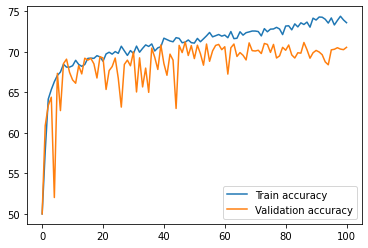

In [27]:
import matplotlib.pyplot as plt
plt.plot(a,label="Train accuracy")
plt.plot(b,label="Validation accuracy")
plt.legend()